<a href="https://colab.research.google.com/github/gusthcf/ia-ufop/blob/main/Apresentacao-disciplina/Agentes-implementacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementação - Smart house**

A seguir, vamos apresentar a implementação de uma possível funcionalidade de um Data Center.

Imagine que a implementação simule um agente que gerencia o uso de energia em um data center, comparando duas estratégias:
1. Média histórica simples do preço da energia.
2. Média móvel dos últimos 5 dias.


# Importar bibliotecas necessárias para executar o código


In [97]:
from random import *
import matplotlib.pyplot as plt
import numpy as np

# Definição do ambiente

Vamos armazenar no ambiente as seguintes informações:

*   Informação do dia
*   Preço do produto em cada um dos dias da série
*   Histórico de preços
*   Histórico de estoque
*   Histórico com a quantidade de produtos comprados

In [98]:
# Definicao da classe ambiente
class Ambiente():

  def __init__(self):
    # Ambiente explorado pelo agente de compra de papel higienico
    self.estoque=300 # Valor do estoque inicial
    self.historico_preco=[1.25]
    self.historico_estoque=[self.estoque]
    self.historico_qtde_comprados=[0]
    self.historico_consumo=[0]

  def percebe_preco_atual(self):
    return self.historico_preco[len(self.historico_preco)-1]

  def percebe_estoque(self):
    return self.historico_estoque[len(self.historico_estoque)-1]

  def run(self, dic_acoes):
    '''Realizar alteracoes no ambiente:
       Definir, aleatoriamente, uma quantidade de produtos consumidos
       Atualizar o historico do preco atual e do estoque.
       Essas informacoes serao utilizadas pelo agente para decidir a compra ou nao de produtos
    '''
    # Consumo realizado (valores gerados aleatoriamente)
    qtde_consumidos = randint(200,400) # recebe aleatoriamente valores entre 200 e 400 [start, end] - Intervalo fechado
    estoque_atual = self.historico_estoque[len(self.historico_estoque)-1] - qtde_consumidos + dic_acoes["comprar"]
    self.historico_estoque.append(estoque_atual)
    self.historico_qtde_comprados.append(dic_acoes["comprar"])
    self.historico_consumo.append(qtde_consumidos)

    # Informando valor do produto no periodo (Atualizacao para o proximo dia)
    valor = 0.5 + 1.5 * random() # novo valor do produto. random() gera valores entre [0,1]
    self.historico_preco.append(valor)

# Definição do agente

O agente vai armazenar informações sobre:
*   Ambiente (Composição de classes)
*   Valor médio das compras
*   Informação do último valor do produto
*   Informação sobre o estoque atual de produtos na casa

In [99]:
# Definição da classe agente

class Agente():

  def __init__(self, ambiente):
    self.num_dias = 1
    self.ambiente= ambiente
    self.estoque= ambiente.percebe_estoque()
    self.total_gasto = 0
    self.preco_atual = self.media = ambiente.percebe_preco_atual()

  def executa_agente(self, qtde_dias):

    for i in range(qtde_dias):
      # O agente percebe o estado do ambiente
      self.estoque= self.ambiente.percebe_estoque()
      self.preco_atual= self.ambiente.percebe_preco_atual()

      '''
        Controlador do agente:
        - Define a regra para compra de produtos
      '''
      if self.estoque <= 0:
        break
      elif self.estoque <= 500:
        compra = 500 - self.estoque
      else:
        compra= 0

      # Fim do controlador
      self.total_gasto += self.preco_atual*compra
      # O agente aplica modificacoes ao ambiente)
      self.ambiente.run({"comprar": compra})

      self.num_dias+=1
      self.media = (self.media*(self.num_dias-1) + self.preco_atual)/self.num_dias

# Definir classe para impressão dos resultados


In [100]:
class Imprime():
  def imprime_resultado(agente):
    historico_dias = np.linspace(1, agente.num_dias, agente.num_dias)

    # Primeira impressão: historico do preco
    plt.plot(historico_dias, agente.ambiente.historico_preco, 'bo-', label='Historico (preço)')
    plt.legend()
    plt.show()

    # Segunda impressão: historico qtde itens comprados
    fig, ax = plt.subplots()
    ax.vlines(historico_dias, ymin=0, ymax=agente.ambiente.historico_qtde_comprados)
    ax.plot(historico_dias, agente.ambiente.historico_qtde_comprados, "go")
    ax.set_ylim(0, 500)
    plt.show()

    # Terceira impressão: historico do estoque
    plt.plot(historico_dias, agente.ambiente.historico_estoque, 'rD-', label='Historico (estoque)')
    plt.legend()
    plt.show()

    # quarta impressão: historico do consumo
    plt.plot(historico_dias,agente.ambiente.historico_consumo , 'ms-', label='Novo gráfico')
    plt.legend()
    plt.show()

    print(agente.total_gasto)
    print(agente.ambiente.historico_estoque)
    print(agente.ambiente.historico_consumo)



# Execução do programa

Por um determinado número de iterações, vamos gerar valores aleatórios para o preco do papel higienico e a quantidade de produto consumido

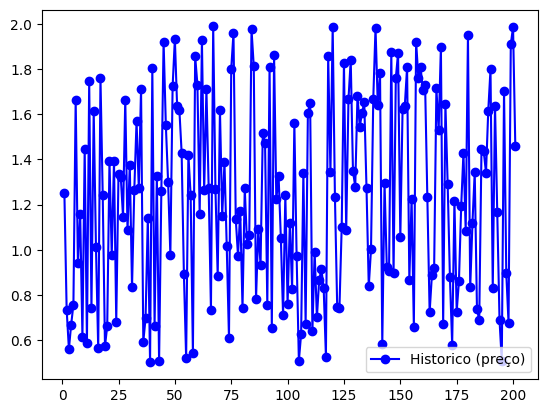

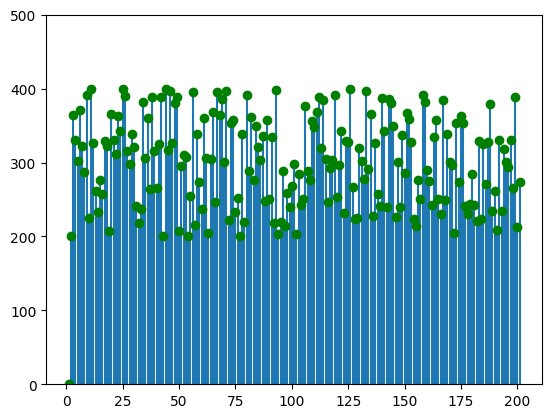

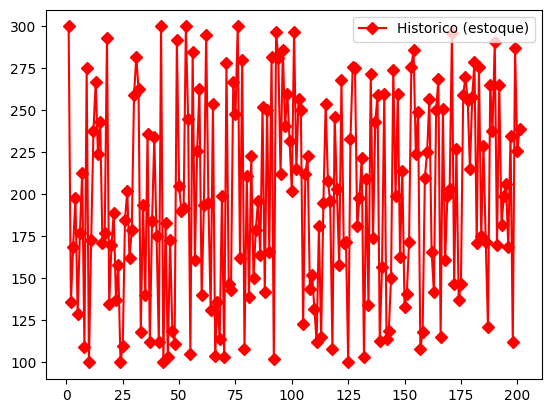

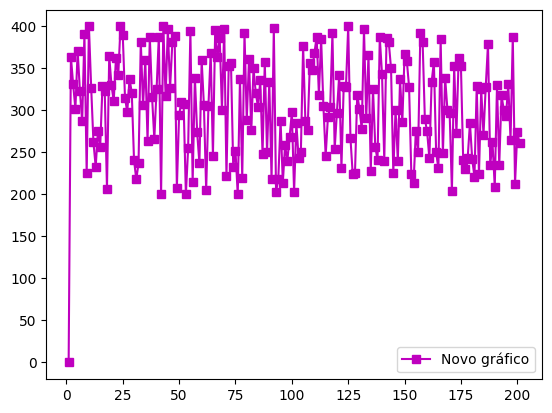

74123.20189846687
[300, 136, 169, 198, 129, 177, 213, 109, 275, 100, 173, 238, 267, 224, 243, 171, 177, 293, 135, 170, 189, 137, 158, 100, 110, 185, 202, 162, 179, 259, 282, 263, 118, 194, 140, 236, 112, 184, 234, 175, 112, 300, 100, 183, 103, 173, 119, 111, 292, 205, 190, 192, 300, 245, 105, 285, 161, 226, 263, 140, 194, 295, 195, 131, 254, 104, 136, 114, 199, 103, 278, 147, 143, 267, 248, 300, 162, 280, 108, 211, 139, 223, 150, 179, 196, 164, 252, 142, 250, 166, 282, 102, 297, 281, 212, 286, 241, 260, 232, 202, 297, 215, 257, 250, 123, 212, 223, 144, 152, 132, 112, 181, 115, 195, 254, 208, 196, 108, 246, 203, 158, 268, 171, 172, 100, 233, 276, 275, 181, 198, 222, 103, 209, 134, 272, 174, 243, 259, 113, 157, 260, 114, 119, 150, 274, 199, 260, 163, 214, 133, 141, 172, 276, 286, 224, 249, 108, 118, 210, 225, 257, 166, 142, 250, 269, 115, 251, 161, 199, 203, 296, 147, 227, 137, 147, 259, 270, 256, 215, 258, 279, 171, 276, 175, 229, 172, 121, 265, 238, 291, 170, 265, 182, 199, 206, 169, 2

In [101]:
ambiente_atuacao = Ambiente()
smart_house = Agente(ambiente_atuacao)
smart_house.executa_agente(20)


Imprime.imprime_resultado(smart_house)